In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen, urlretrieve
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [2]:
parser = Sbopen()
match_files = [3835329]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [3]:
sb.lineups(match_id=3835329)

{"Denmark Women's":     player_id                      player_name player_nickname  jersey_number  \
 0        4650                      Nadia Nadim            None              9   
 1       10088                     Katrine Veje            None             11   
 2       10102                     Stine Larsen            None             12   
 3       10108        Pernille Mosegaard Harder            None             10   
 4       10109        Sanne Troelsgaard-Nielsen            None              7   
 5       10111             Simone Boye-Sørensen            None              5   
 6       10275             Sofie Junge Pedersen            None             13   
 7       15789            Rikke Læntver Sevecke   Rikke Sevecke              4   
 8       24460             Signe Kallesøe Bruun            None             20   
 9       32223     Sara Gedsted Thrige Andersen            None              2   
 10      32229                   Sara Holmgaard            None              8 

In [4]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
ateamColor = "#003581"
MVP = 10108
MVPname = "Pernille Harder"
tournament = "Women's EURO 2022"
textColor = "black"
hteam = "Denmark Women's"
ateam = "WNT Finland"

In [5]:
dbuURL = "https://brandslogos.com/wp-content/uploads/images/large/dbu-logo.png"
response = requests.get(dbuURL)
DBU = Image.open(BytesIO(response.content))

In [6]:
Statsbomb = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [7]:
harderURL = "https://images.fotmob.com/image_resources/playerimages/200707.png"
response = requests.get(harderURL)
harderPic = Image.open(BytesIO(response.content))

In [8]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [9]:
shots = df[df.type_name == "Shot"]
shots = shots[shots.team_name == hteam]

shots = shots[['team_name', 'player_name', 'minute', 'second',"x","y", 'shot_statsbomb_xg', 'outcome_name', "type_name", "id"]]


goals = shots[shots.outcome_name == 'Goal']

In [10]:
passes = df[df.type_name == "Pass"]
passes = passes[passes.team_name == hteam]
passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!="Pass Offisde") & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown")]

passes = passes[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                     "end_x","end_y", "type_name"]]
passes = passes.reset_index()

In [11]:
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [12]:
mvpPasses = df[df["player_id"]== MVP]
mvpPasses = mvpPasses[mvpPasses["type_name"]== "Pass"]
mvpPasses = mvpPasses[(mvpPasses["type_name"]!="Kick Off") & (mvpPasses["type_name"]!="Goal Kick") 
                    & (mvpPasses["type_name"]!="Free Kick") & (mvpPasses["type_name"]!="Throw-in") 
                    & (mvpPasses["type_name"]!="Corner") & (mvpPasses["outcome_name"]!="Incomplete") 
                    & (mvpPasses["outcome_name"]!="Pass Offisde") & (mvpPasses["outcome_name"]!="Out") 
                    & (mvpPasses["outcome_name"]!="Unknown")]
mvpPasses = mvpPasses[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "outcome_name",
                     "end_x","end_y", "type_name"]]
mvpPasses = mvpPasses.reset_index()

mvpPasses['beginning'] = np.sqrt(np.square(120-mvpPasses['x']) + np.square(40 -mvpPasses['y']))
mvpPasses['end'] = np.sqrt(np.square(120 - mvpPasses['end_x']) + np.square(40 - mvpPasses['end_y']))

mvpPasses['progressive'] = [(mvpPasses['end'][x]) / (mvpPasses['beginning'][x]) < .75 for x in range(len(mvpPasses.beginning))]

mvpPropgPasses = mvpPasses[mvpPasses["progressive"]==True]
countMvpPasses = mvpPasses.shape[0]
countMVPProg = mvpPropgPasses.shape[0]

In [13]:
events = df[df["player_id"]== MVP]
events = events[(events["type_name"]!= 'Ball Receipt') & (events["type_name"]!= 'Injury Stoppage') 
                            & (events["type_name"]!= 'Player Off') & (events["type_name"]!= 'Player On') 
                            & (events["type_name"]!= 'Substitution') & (events["type_name"]!= 'Miscontrol')
                      & (events["type_name"]!= 'Shot') & (events["type_name"]!= 'Dispossessed')]
events = events[(events["outcome_name"]!="Incomplete") & (events["outcome_name"]!="Blocked") 
                      & (events["outcome_name"]!="Out") 
                    & (events["outcome_name"]!="Lost Out") & (events["outcome_name"]!="Lost In Play")]

events = events[[ 'player_name',"player_id", 'minute', 'second', 'x',"y", "type_name", 
                             "outcome_name"]]



BallRecovery = events[events.type_name == 'Ball Recovery']

Interception = events[events.type_name == 'Interception']


Dribble = events[events.type_name == 'Dribble']
Dribble = Dribble[Dribble.outcome_name == 'Complete']

Tackle = events[events.type_name == "Tackle"]

Clearance = events[events.type_name == "Clearance"]

Block = events[events.type_name == "Block"]

Carry = events[events.type_name == "Carry"]

Pressure = events[events.type_name == "Pressure"]

Duel = events[events.type_name == "Duel"]
Duel = Duel[Duel['outcome_name'].notna()]

countBallRecovery = BallRecovery.shape[0]
countInterception = Interception.shape[0]
countDribble = Dribble.shape[0]
countClearance = Clearance.shape[0]
countBlock = Block.shape[0]
countCarry = Carry.shape[0]
countPressure = Pressure.shape[0]
countDuel = Duel.shape[0]

In [14]:
passes["passer"] = passes["player_id"]
passes["recipient"] = passes["player_id"].shift(-1)

In [20]:
average_locations = passes.groupby("passer").agg({"x":["mean"], "y": ["mean", "count"]})
average_locations.columns = ["x","y", "count", ]
average_locations.sort_values(by="passer", ascending=True)

mvp_location = average_locations[average_locations.index == MVP]

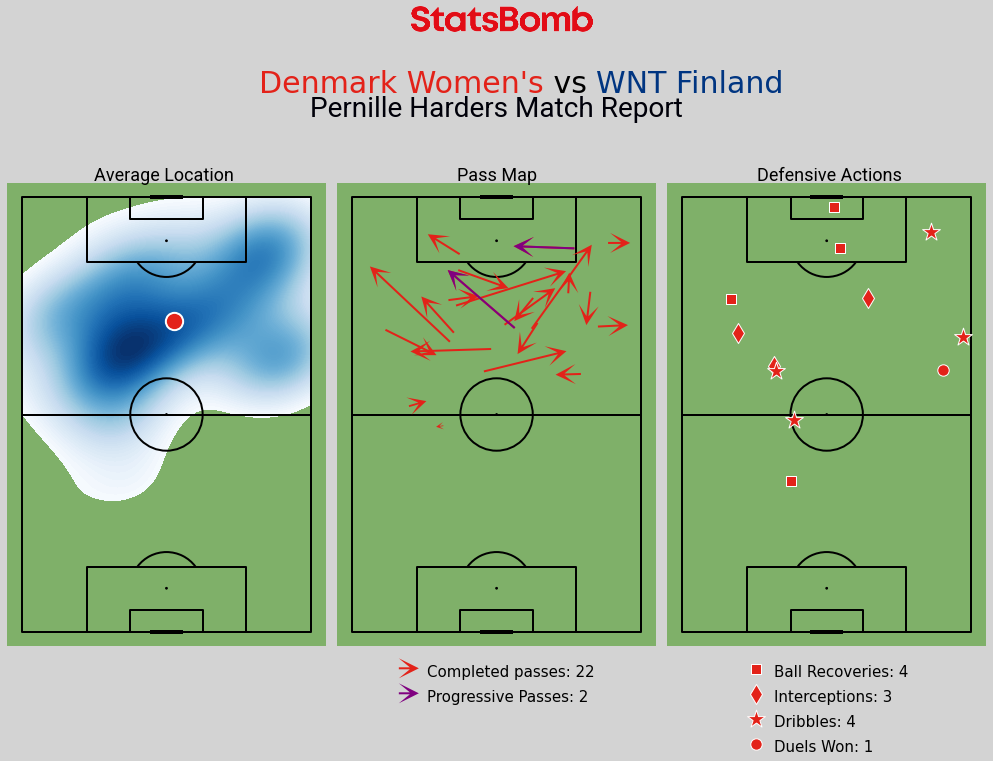

In [25]:
pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
fig.set_facecolor("lightgrey")

axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.50, 0.01, f"Pass Map", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)


HighlightText(x=.25, y=19,
              s=f'<{hteam}> vs <{ateam}>', fontsize=30,
              highlight_textprops=[{"color": hteamColor},
                                   {"color": ateamColor}])

TITLE_STR1 = f'{MVPname}s Match Report'
title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')


average_location = pitch.scatter(mvp_location.x, mvp_location.y,
                           s=300,
                           marker= "o", color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1,
                       ax=axs['pitch'][0], zorder=4)

kde = pitch.kdeplot(events.x, events.y, ax=axs['pitch'][0],
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1,
                    cmap = "Blues")


pitch.arrows(mvpPasses.x, mvpPasses.y,
             mvpPasses.end_x, mvpPasses.end_y, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label=f"Completed passes: {countMvpPasses}")

pitch.arrows(mvpPropgPasses.x, mvpPropgPasses.y,
             mvpPropgPasses.end_x, mvpPropgPasses.end_y, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Progressive Passes: {countMVPProg}")


scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c= hteamColor, edgecolor = "white",
                                 s=120, marker='s',  ax=axs['pitch'][2], zorder=2, label=f"Ball Recoveries: {countBallRecovery}")

scatter_interception = pitch.scatter(Interception.x, Interception.y, c= hteamColor,
                                     s=200, marker='d', edgecolor = "white", ax=axs['pitch'][2], zorder=2, label=f"Interceptions: {countInterception}")

scatter_dribble = pitch.scatter(Dribble.x, Dribble.y, c= hteamColor, edgecolor= "white",
                                s=350, marker='*',  ax=axs['pitch'][2], zorder=2, label= f"Dribbles: {countDribble}")

scatter_duel = pitch.scatter(Duel.x, Duel.y, c=hteamColor, edgecolor= "white",
                               s=520, marker=".",  ax=axs['pitch'][2], zorder=2, label= f"Duels Won: {countDuel}")




legend = axs['pitch'][1].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01), fancybox=True)
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')
    
legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')

sb_logo = fig.add_axes([0.38, 1.04, 0.25, 0.04])
sb_logo.axis('off')
sb_logo.imshow(Statsbomb)



#plt.savefig(f'viz/{MVPname} Match Report vs {ateam}, {tournament}', dpi=300, bbox_inches='tight')